In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [2]:
# 1. Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)


In [3]:
# 2. IMAGE PROCESSING / PREPROCESSING

# Normalize to 0–1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Reshape for CNN input
# batch, height, width, channels(1 grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [5]:
# 3. BUILD CNN MODEL
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'), # deep feature detection
    MaxPooling2D((2,2)),   # reduces complexity

    Flatten(),  # converts 2D into 1D so that it can be passed to dense
    Dense(128, activation='relu'), # hidden neural layer decision making
    Dropout(0.3),  # reduces overfitting

    Dense(10, activation='softmax')  # give output from 0-9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # adam - fast learning optimizer

model.summary()

c:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 4. TRAIN MODEL
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)  # learns to detect and train model

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9483 - loss: 0.1684 - val_accuracy: 0.9878 - val_loss: 0.0416
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9816 - loss: 0.0597 - val_accuracy: 0.9895 - val_loss: 0.0384
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9905 - val_loss: 0.0293
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9935 - val_loss: 0.0275
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9910 - val_loss: 0.0318


In [7]:
# 5. EVALUATE MODEL

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0284

Test Accuracy: 0.9908999800682068


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


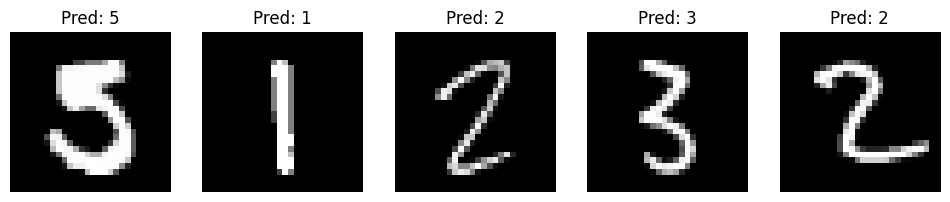

In [8]:
# 6. PREDICTION FROM TEST DATA

plt.figure(figsize=(12, 4))

for i in range(5):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx].reshape(28, 28)
    pred = model.predict(x_test[idx].reshape(1, 28, 28, 1))
    digit = np.argmax(pred)

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {digit}")
    plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted digit: 8


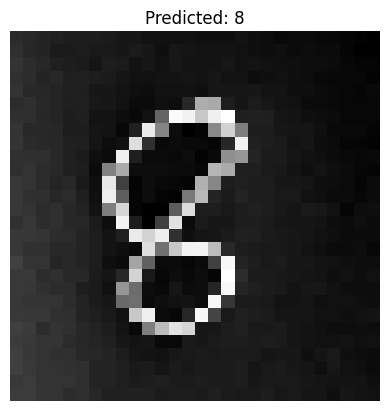

In [10]:
# 7. EXTERNAL IMAGE PREDICTION (REAL IMAGE)

def predict_external_image(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Resize to 28x28
    img_resized_for_display = cv2.resize(img, (28, 28))

    # Invert colors if needed (white background, black digit)
    # This step is often crucial for hand-drawn digits where digits are dark on light background
    # but the model was trained on light digits on dark background (MNIST original format)
    img_inverted_for_model = cv2.bitwise_not(img_resized_for_display)

    # Normalize
    img_norm = img_inverted_for_model / 255.0

    # Reshape for model prediction
    final_img = img_norm.reshape(1, 28, 28, 1)

    # Predict
    pred = model.predict(final_img)
    digit = np.argmax(pred)

    print("Predicted digit:", digit)

    # Show the image as it's fed to the model (after inversion if applicable)
    plt.imshow(img_inverted_for_model, cmap='gray')
    plt.title(f"Predicted: {digit}")
    plt.axis('off')
    plt.show()

# Example (Only works if an image exists — you can upload in Colab):
predict_external_image("./Eight.jpg")

In [11]:
# 8. SAVE MODEL

model.save("handwritten_digit_cnn_model.h5")
print("\nModel saved as handwritten_digit_cnn_model.h5")


Model saved as handwritten_digit_cnn_model.h5
